# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | happy valley-goose bay
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | mitu
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | hays
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | saudarkrokur
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | palma sola
Processing Record 16 of Set 1 | hell-ville
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | belyy yar
Processing Record 19 of Set 1 | albufeira
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | aasiaat
Processing Record 2

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,28.56,86,40,2.30,CA,1712122161
1,happy valley-goose bay,53.3168,-60.3315,30.51,93,100,6.91,CA,1712122182
2,puerto natales,-51.7236,-72.4875,37.72,76,85,10.98,CL,1712122142
3,mitu,1.1983,-70.1733,73.08,99,73,1.95,CO,1712122267
4,tiksi,71.6872,128.8694,1.20,89,100,3.71,RU,1712122142


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'cities.csv'

In [45]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

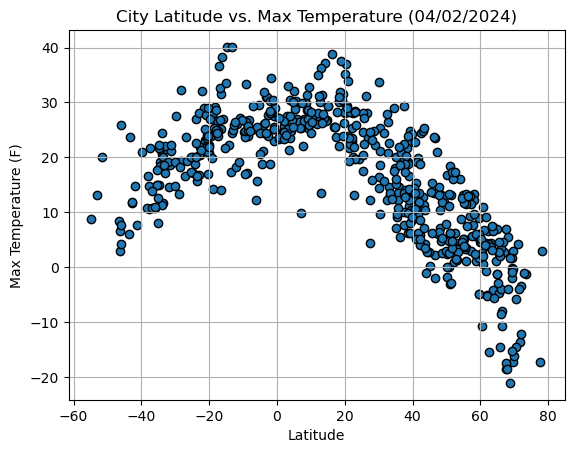

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/02/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

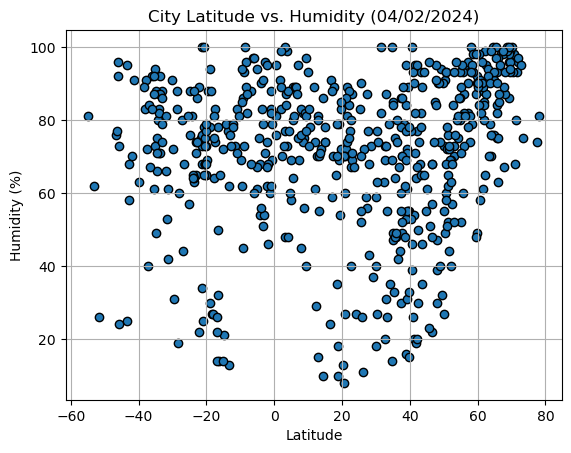

In [26]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/02/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

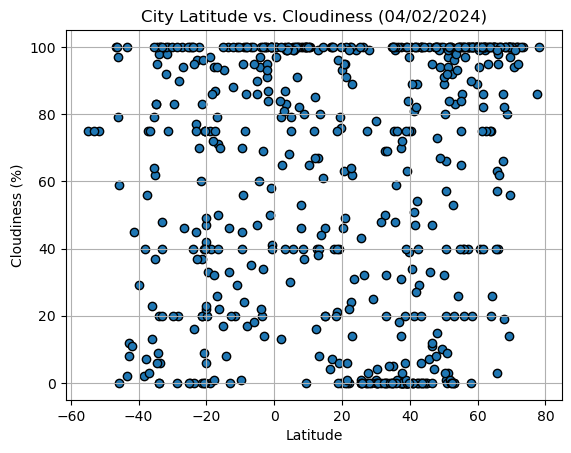

In [27]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/02/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

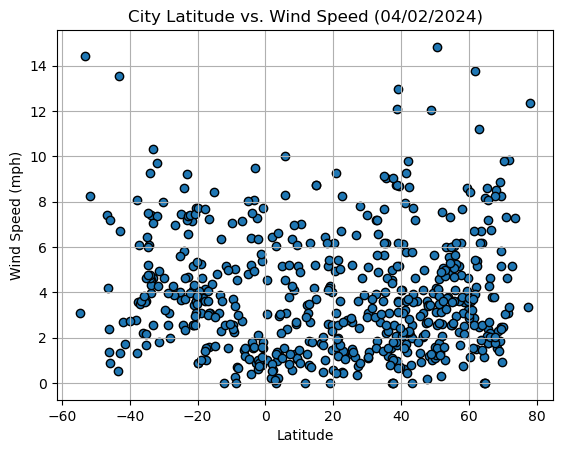

In [28]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/02/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Print r-value
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825364


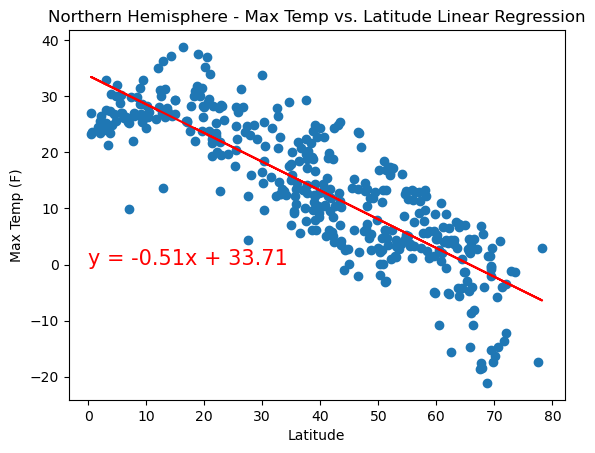

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Latitude', 'Max Temp (F)', (0,0))


The r-value is: 0.6419546065421801


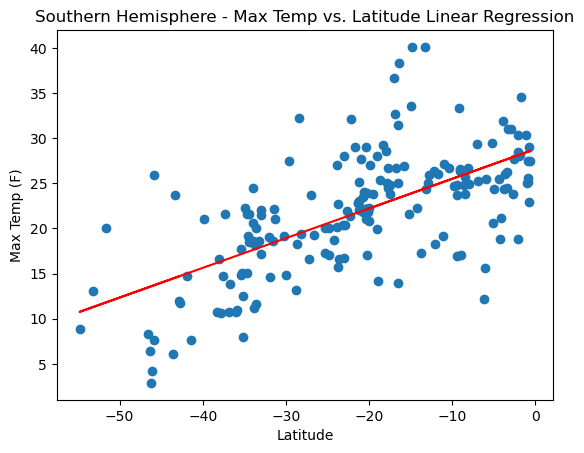

In [37]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Latitude', 'Max Temp (F)', (-30,50))


**Discussion about the linear relationship:** The analysis shows:
- Northern Hemisphere: As latitude increases, maximum temperature decreases.
- Southern Hemisphere: As latitude increases, maximum temperature increases.
These findings align with expected temperature trends based on Earth's shape and tilt.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2385317912939407


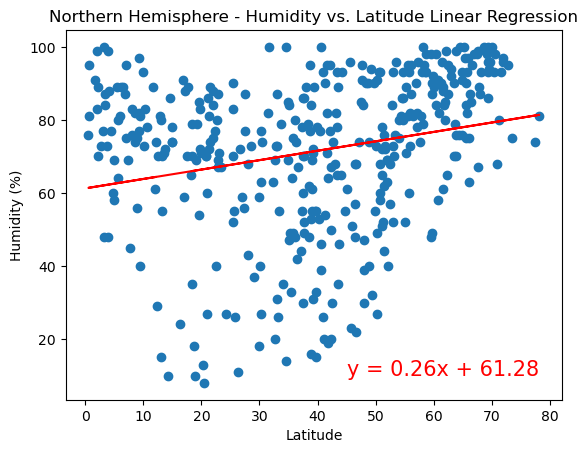

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Humidity vs. Latitude Linear Regression', 'Latitude', 'Humidity (%)', (45,10))


The r-value is: 0.016759316950056818


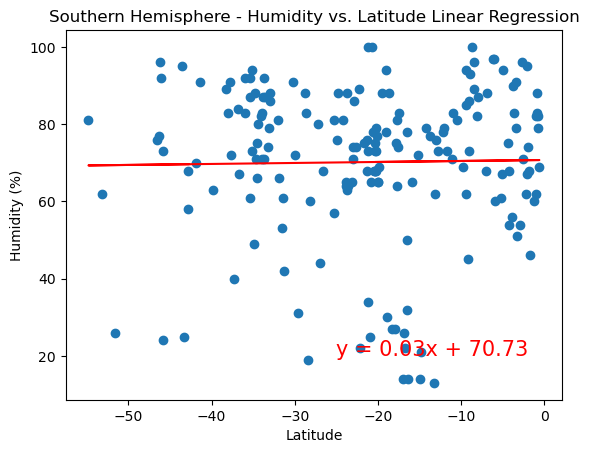

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Humidity vs. Latitude Linear Regression', 'Latitude', 'Humidity (%)', (-25,20))


**Discussion about the linear relationship:** Similar to the Northern Hemisphere, there is no evident correlation between latitude and humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.155004893876971


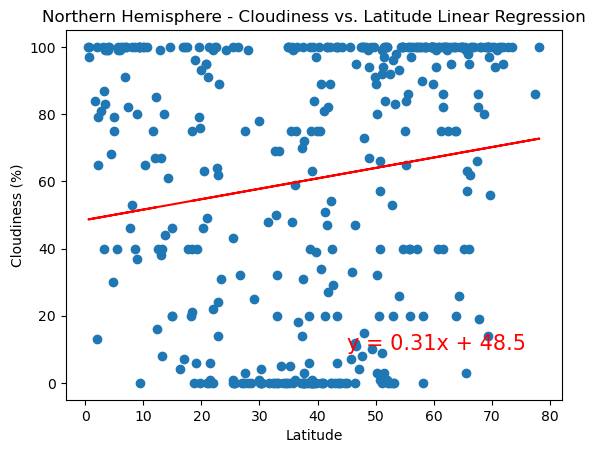

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'Latitude', 'Cloudiness (%)', (45,10))


The r-value is: 0.14341322916643243


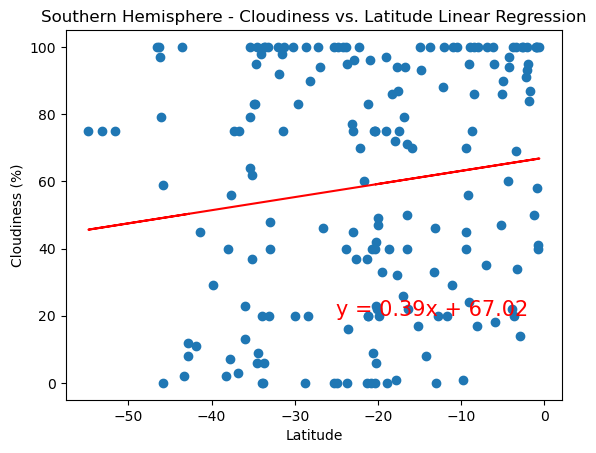

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', 'Latitude', 'Cloudiness (%)', (-25,20))

**Discussion about the linear relationship:** 
The linear regression analysis indicates no significant correlation between latitude and cloudiness in both the Northern and Southern Hemispheres. This suggests that latitude alone may not reliably predict cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1743466729090334


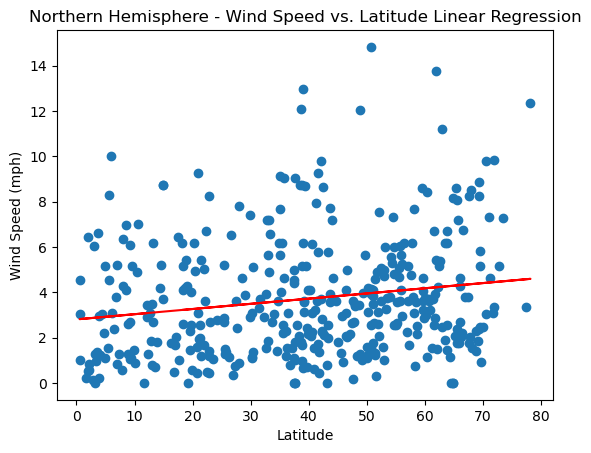

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'Latitude', 'Wind Speed (mph)', (40,25))


The r-value is: -0.24947753546264592


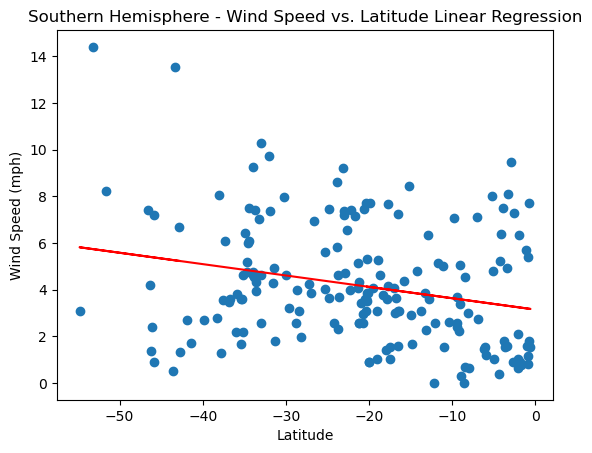

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', 'Latitude', 'Wind Speed (mph)', (-30,25))

**Discussion about the linear relationship:** 
The linear regression analysis suggests a slight positive correlation between latitude and wind speed in both hemispheres, with higher latitudes experiencing marginally higher wind speeds. However, the relationship is weak, indicating latitude alone may not be a reliable predictor of wind speed.